# Ensemble of classifiers 

Goal: construction of a set of classifiers, and then classification of new cases based on voting - labels assigned to objects by each of the team members
- Possibility of obtaining a higher quality of classification for several classifiers compared to a single one
- Two basic team building methods: bagging and boosting

## Bagging (Bootstrap Aggregation)

Bootstrap aggregation - construction of team members based on pseudo-samples
- Random pseudo-sample with return
- 1 classifier = 1 pseudo-sample
- Classifying an object based on an equal majority vote - victory of the class with the most votes

The most known algorithm for Bagging is Random Forest!!!

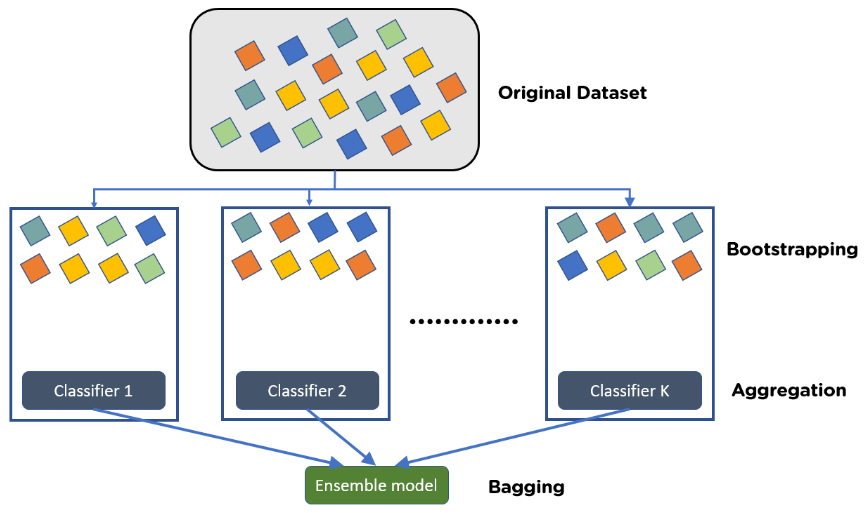

## Boosting with example of AdaBoost (Adaptive Boosting)

- Improvement of the bagging method - creating pseudo-samples, but drawing from a variable probability distribution (change every sample)
- First classifier same as bagging
- Gaining more and more weight from misclassified cases

Let’s see all the steps taken in AdaBoost.

- Build a model and make predictions.
- Assign higher weights to miss-classified points.
- Build next model.
- Repeat steps 3 and 4.
- Make a final model using the weighted average of individual models.

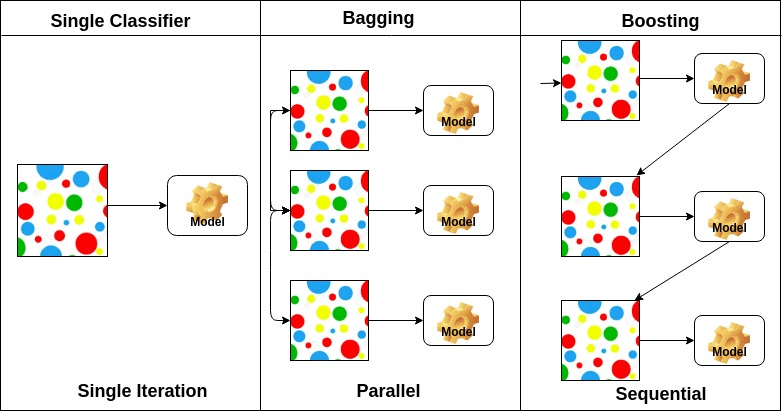


## AdaBoost in Python

In [7]:
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=1)

In [9]:
# Usage of simple tree
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier(max_depth=1, criterion='gini',
                               random_state=1)
dtclf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=1)

In [10]:
from sklearn.metrics import accuracy_score


dtclf_train_sc = accuracy_score(y_train, dtclf.predict(X_train))
dtclf_test_sc = accuracy_score(y_test, dtclf.predict(X_test))
print('Decision tree train/test accuracies %.3f/%.3f' % (dtclf_train_sc, dtclf_test_sc))


Decision tree train/test accuracies 0.697/0.694


In [11]:
# Usage of AdaBoost
from sklearn.ensemble import AdaBoostClassifier

adaclf = AdaBoostClassifier(base_estimator=dtclf,
                            n_estimators=50,
                            learning_rate=0.5,
                            algorithm='SAMME.R',
                            random_state=1)


adaclf.fit(X_train, y_train)

adaclf_train_sc = accuracy_score(y_train, adaclf.predict(X_train))
adaclf_test_sc = accuracy_score(y_test, adaclf.predict(X_test))
print('AdaBoost train/test accuracies %.3f/%.3f' % (adaclf_train_sc, adaclf_test_sc))


TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

Important hyperparameters in AdaBoost
The following are the most important hyperparameters in both AdaBoostClassifier() and AdaBoostRegressor().
- base_estimator: This is the base learner used in AdaBoost algorithms. The default and most common learner is a decision tree stump (a decision tree with max_depth=1) as we discussed earlier.
- n_estimators: The maximum number of estimators (models) to train sequentially. The default is 50. We’ll measure the effect of this hyperparameter soon.
- learning_rate: This determines the weight applied to each estimator in the boosting process. The default is 1. Smaller values such as 0.05, 0.1 force the algorithm to train slower but with high-performance scores. We’ll measure the effect of this hyperparameter soon.


In [ ]:
x = list(range(2, 102, 2))
y = []

for i in x:
    adaclf = AdaBoostClassifier(base_estimator=dtclf,
                              n_estimators=i,
                              learning_rate=0.5,
                              algorithm='SAMME.R',
                              random_state=1)
  
    adaclf.fit(X_train, y_train)
    adaclf_test_sc = accuracy_score(y_test, adaclf.predict(X_test))
    y.append(adaclf_test_sc)

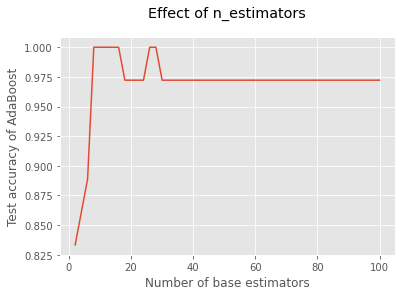

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.title("Effect of n_estimators", pad=20)
plt.xlabel("Number of base estimators")
plt.ylabel("Test accuracy of AdaBoost")
plt.plot(x, y)

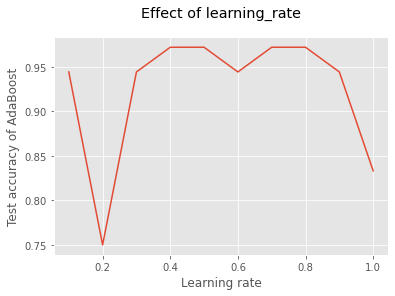

In [ ]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
y = []

for i in x:
    adaclf = AdaBoostClassifier(base_estimator=dtclf,
                            n_estimators=50,
                              learning_rate=i,
                              algorithm='SAMME.R',
                              random_state=1)
  
    adaclf.fit(X_train, y_train)
    adaclf_test_sc = accuracy_score(y_test, adaclf.predict(X_test))
    y.append(adaclf_test_sc)


plt.title("Effect of learning_rate", pad=20)
plt.xlabel("Learning rate")
plt.ylabel("Test accuracy of AdaBoost")
plt.plot(x, y)

## Find the optimal hyperparameter values using Grid Search

Here, we automatically tune (find optimal values) both hyperparameters at the same time by using Grid Search. In contrast, in the previous steps, we tuned one hyperparameter at a time.


In [ ]:
from sklearn.model_selection import GridSearchCV

hyperparameter_space = {'n_estimators':list(range(2, 102, 2)), 
                        'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

gs = GridSearchCV(AdaBoostClassifier(base_estimator=dtclf,
                                     algorithm='SAMME.R',
                                     random_state=1),
                  param_grid=hyperparameter_space, 
                  scoring="accuracy", n_jobs=-1, cv=5) #bn_jobs - number of jobs to run in parallel; -1 means using all processors

gs.fit(X_train, y_train)
print("Optimal hyperparameter combination:", gs.best_params_)

Optimal hyperparameter combination: {'learning_rate': 0.8, 'n_estimators': 42}


## Note about randomness:

The model’s outputs can be largely affected by random data splitting. You may get different accuracy scores depending on the integer specified in the random_state. It is always recommended to specify an integer to get static results at different executions.